### Exercise-03
### Index No - 190621M
### Name - K. Thanushan

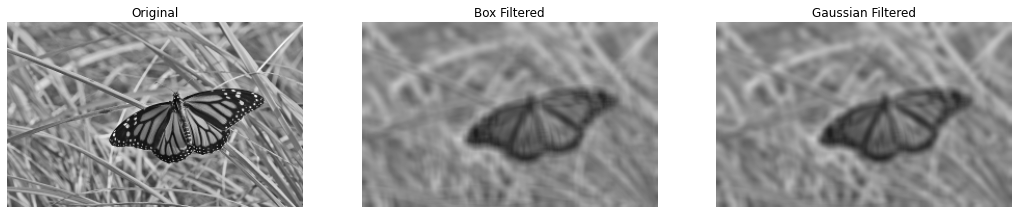

In [15]:
#Question 1
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'butterfly.jpg', cv.IMREAD_REDUCED_GRAYSCALE_4).astype(np.float32)
assert img is not None

k_size = 9
sigma = 4
box_kernel = 1./81*np.ones((9,9))
img_avg = cv.filter2D(img, -1 , box_kernel)
img_gaussian = cv.GaussianBlur(img, (k_size, k_size), sigma)

fig, ax = plt.subplots(1, 3 , figsize = (18, 6))
ax[0].imshow(img,cmap='gray', vmin=0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(img_avg,cmap='gray', vmin=0, vmax = 255)
ax[1].set_title('Box Filtered')
ax[2].imshow(img_gaussian,cmap='gray', vmin=0, vmax = 255)
ax[2].set_title('Gaussian Filtered')
for i in range(3):
    ax[i].axis('off')
plt.show()

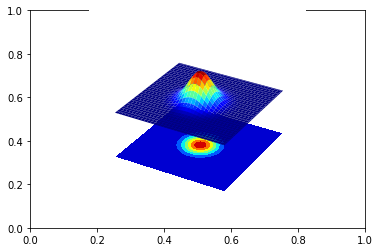

In [33]:
#Question 2
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from  mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig, ax  = plt.subplots()
ax = fig.add_subplot(111, projection = '3d')

sigma = 1
step = 0.1
X = np.arange(-5, 5 + step,step)
Y = np.arange(-5, 5 + step,step)
XX, YY = np.meshgrid(X, Y)
g = np.exp(-(XX**2 + YY**2)/(2*sigma**2))

surf = ax.plot_surface(XX, YY, g, cmap = cm.jet)
cset = ax.contourf(XX, YY, g, zdir = 'z', offset  = np.min(g) - 1.5, cmap = cm.jet)
ax.set_zlim(np.min(g)-2, np.max(g))
ax.axis('off')
plt.show()

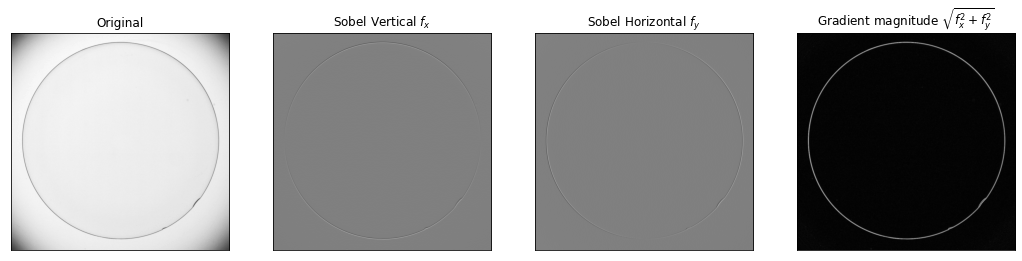

In [17]:
#Question 3
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'contact_lens.tif', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sobel_v = np.array([[-1,-2,-1], [0,0,0], [1,2,1]], dtype = np.float32)
f_x = cv.filter2D(img,-1, sobel_v)

sobel_h = np.array([[-1,0,1], [-2,0,2], [-1,0,1]], dtype = np.float32)
f_y = cv.filter2D(img,-1, sobel_h)

grad_mag = np.sqrt(f_x**2 + f_y**2 )


fig, ax = plt.subplots(1, 4 , figsize = (18, 6))
ax[0].imshow(img,cmap='gray', vmin=0, vmax = 255)
ax[0].set_title('Original')
ax[1].imshow(f_x,cmap='gray', vmin=-1020, vmax = 1020)
ax[1].set_title('Sobel Vertical $f_x$')
ax[2].imshow(f_y,cmap='gray', vmin=-1020, vmax = 1020)
ax[2].set_title('Sobel Horizontal $f_y$')
ax[3].imshow(grad_mag,cmap='gray')
ax[3].set_title('Gradient magnitude $\sqrt{f_x^2 + f_y^2}$')

for i in range(4):
    ax[i].set_xticks([]),ax[i].set_yticks([])
plt.show()

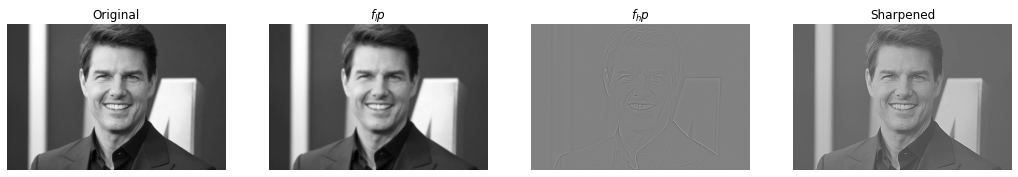

In [12]:
#Question 4
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r'tom.jpg', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None

sigma = 2
gaussian_1D = cv.getGaussianKernel(5, sigma)
f_lp  = cv.sepFilter2D(img,-1, gaussian_1D, gaussian_1D)
f_hp  = img - f_lp
f_sharpened  = cv.addWeighted(img,1.0,f_hp,2.0,0)

fig, ax = plt.subplots(1, 4 , figsize = (18, 6))
ax[0].imshow(img,cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(f_lp,cmap='gray')
ax[1].set_title('$f_lp$')
ax[2].imshow(f_hp,cmap='gray')
ax[2].set_title('$f_hp$')
ax[3].imshow(f_sharpened,cmap='gray')
ax[3].set_title('Sharpened')
for i in range(4):
    ax[i].axis('off')
plt.show()